<div class="alert">
    <h1 align="center">Data Mining</h1>
    <h3 align="center"><a href="https://github.com/amirjahantab/">Amirreza Jahantab</a></h3>
    <h5 align="center">401370007</h5>
</div>


## preprocessing 

In [1]:
import pandas as pd
import numpy as np
import re
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('datasetprojmabahes.xlsx')
data.head()

,From_To,FlightNumber,RecentDelays,Airline
0,Stockholm_London,10045.0,[72],"""Swiss Air"""
1,Paris_Milan,NaN,[],(Air Italy)
2,Brussels_Amsterdam,10065.0,"[14, 16]",Emirates(7)
3,Paris_Stockholm,10075.0,"[27, 27, 78]",(British Airways. )
4,London_Berlin,10085.0,"[94, 29, 65]","""Turkish Airlines"""


In [3]:
type(data.iloc[1, 1])

numpy.float64

In [4]:
data.isnull().sum()

From_To           0
FlightNumber    115
RecentDelays      0
Airline           0
dtype: int64

In [5]:
data['FlightNumber'] = data['FlightNumber'].interpolate(method='linear')
data['FlightNumber'] = data['FlightNumber'].astype(int)
data.head()

,From_To,FlightNumber,RecentDelays,Airline
0,Stockholm_London,10045,[72],"""Swiss Air"""
1,Paris_Milan,10055,[],(Air Italy)
2,Brussels_Amsterdam,10065,"[14, 16]",Emirates(7)
3,Paris_Stockholm,10075,"[27, 27, 78]",(British Airways. )
4,London_Berlin,10085,"[94, 29, 65]","""Turkish Airlines"""


In [6]:
data[['From', 'To']] = data['From_To'].str.split('_', expand=True)
data['From'] = data['From'].str.capitalize()
data['To'] = data['To'].str.capitalize()
data.drop('From_To', axis=1, inplace=True)
data.head()

,FlightNumber,RecentDelays,Airline,From,To
0,10045,[72],"""Swiss Air""",Stockholm,London
1,10055,[],(Air Italy),Paris,Milan
2,10065,"[14, 16]",Emirates(7),Brussels,Amsterdam
3,10075,"[27, 27, 78]",(British Airways. ),Paris,Stockholm
4,10085,"[94, 29, 65]","""Turkish Airlines""",London,Berlin


In [7]:
data['Airline'] = data['Airline'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))
data['Airline'] = data['Airline'].str.title()

In [8]:
data.head()

,FlightNumber,RecentDelays,Airline,From,To
0,10045,[72],Swiss Air,Stockholm,London
1,10055,[],Air Italy,Paris,Milan
2,10065,"[14, 16]",Emirates,Brussels,Amsterdam
3,10075,"[27, 27, 78]",British Airways,Paris,Stockholm
4,10085,"[94, 29, 65]",Turkish Airlines,London,Berlin


In [9]:
delays = data['RecentDelays'].apply(lambda x: eval(x) if isinstance(x, str) else x)
max_delays = max(delays.apply(len)) 
for i in range(max_delays):
    data[f'Delay_{i+1}'] = delays.apply(lambda x: x[i] if len(x) > i else np.nan)
data.head()

,FlightNumber,RecentDelays,Airline,From,To,Delay_1,Delay_2,Delay_3
0,10045,[72],Swiss Air,Stockholm,London,72.0,NaN,NaN
1,10055,[],Air Italy,Paris,Milan,NaN,NaN,NaN
2,10065,"[14, 16]",Emirates,Brussels,Amsterdam,14.0,16.0,NaN
3,10075,"[27, 27, 78]",British Airways,Paris,Stockholm,27.0,27.0,78.0
4,10085,"[94, 29, 65]",Turkish Airlines,London,Berlin,94.0,29.0,65.0


In [10]:
data.drop('RecentDelays', axis=1, inplace=True)

In [11]:
data.head()

,FlightNumber,Airline,From,To,Delay_1,Delay_2,Delay_3
0,10045,Swiss Air,Stockholm,London,72.0,NaN,NaN
1,10055,Air Italy,Paris,Milan,NaN,NaN,NaN
2,10065,Emirates,Brussels,Amsterdam,14.0,16.0,NaN
3,10075,British Airways,Paris,Stockholm,27.0,27.0,78.0
4,10085,Turkish Airlines,London,Berlin,94.0,29.0,65.0


## Statistical Analysis

In [12]:
statistics = data[['FlightNumber', 'Delay_1', 'Delay_2', 'Delay_3']].describe()
statistics

,FlightNumber,Delay_1,Delay_2,Delay_3
count,600.000000,433.000000,302.000000,150.000000
mean,13040.000000,54.903002,55.168874,53.513333
std,1733.493582,25.529029,26.452640,27.508324
min,10045.000000,10.000000,10.000000,11.000000
25%,11542.500000,33.000000,35.000000,30.250000
50%,13040.000000,55.000000,54.000000,51.500000
75%,14537.500000,76.000000,80.000000,78.000000
max,16035.000000,100.000000,100.000000,100.000000


In [13]:
correlation_matrix = data[['FlightNumber', 'Delay_1', 'Delay_2', 'Delay_3']].corr()
correlation_matrix

,FlightNumber,Delay_1,Delay_2,Delay_3
FlightNumber,1.000000,0.056081,0.002616,-0.157544
Delay_1,0.056081,1.000000,0.029720,-0.011081
Delay_2,0.002616,0.029720,1.000000,-0.073923
Delay_3,-0.157544,-0.011081,-0.073923,1.000000


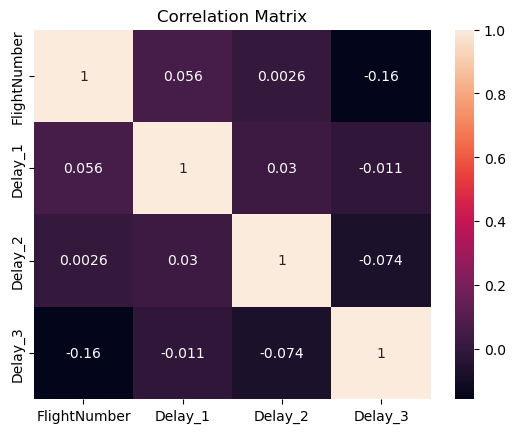

In [14]:
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

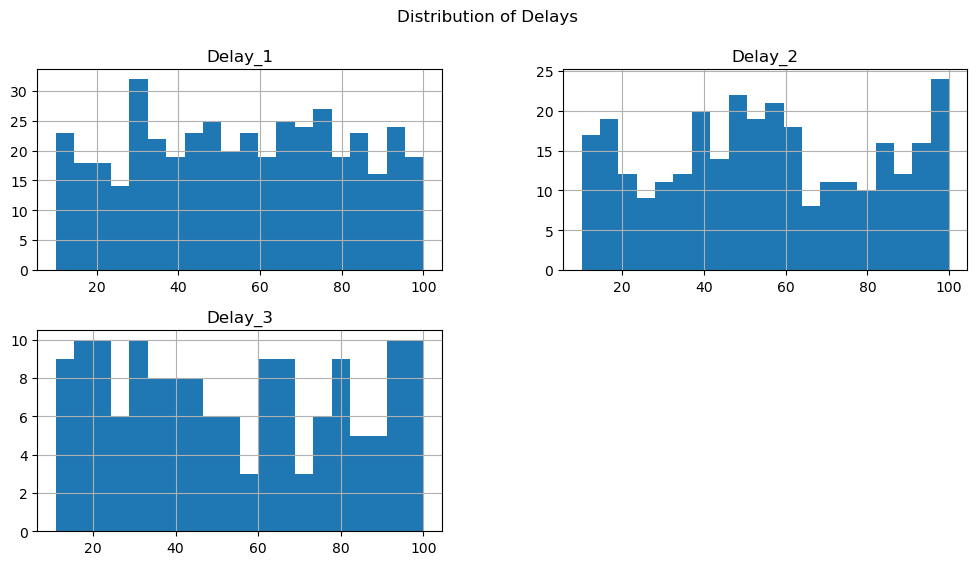

In [15]:
data[['Delay_1', 'Delay_2', 'Delay_3']].hist(bins=20, figsize=(12, 6))
plt.suptitle('Distribution of Delays')
plt.show()

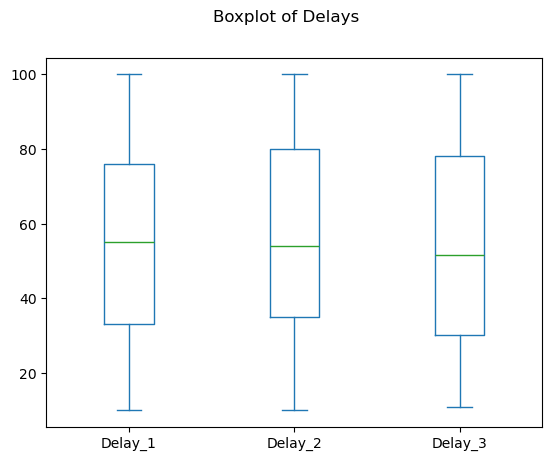

In [16]:
data[['Delay_1', 'Delay_2', 'Delay_3']].plot(kind='box')
plt.suptitle('Boxplot of Delays')
plt.show()

## Extract New Features

In [17]:
data['Total_Delays'] = data[['Delay_1', 'Delay_2', 'Delay_3']].notna().sum(axis=1)
data.head()

,FlightNumber,Airline,From,To,Delay_1,Delay_2,Delay_3,Total_Delays
0,10045,Swiss Air,Stockholm,London,72.0,NaN,NaN,1
1,10055,Air Italy,Paris,Milan,NaN,NaN,NaN,0
2,10065,Emirates,Brussels,Amsterdam,14.0,16.0,NaN,2
3,10075,British Airways,Paris,Stockholm,27.0,27.0,78.0,3
4,10085,Turkish Airlines,London,Berlin,94.0,29.0,65.0,3


In [18]:
data['Sum_Delays'] = data[['Delay_1', 'Delay_2', 'Delay_3']].sum(axis=1)
data.head()

,FlightNumber,Airline,From,To,Delay_1,Delay_2,Delay_3,Total_Delays,Sum_Delays
0,10045,Swiss Air,Stockholm,London,72.0,NaN,NaN,1,72.0
1,10055,Air Italy,Paris,Milan,NaN,NaN,NaN,0,0.0
2,10065,Emirates,Brussels,Amsterdam,14.0,16.0,NaN,2,30.0
3,10075,British Airways,Paris,Stockholm,27.0,27.0,78.0,3,132.0
4,10085,Turkish Airlines,London,Berlin,94.0,29.0,65.0,3,188.0


## PCA

In [19]:
# Standardize
scaler = StandardScaler()
numerical_data = data[['FlightNumber', 'Delay_1', 'Delay_2', 'Delay_3', 'Total_Delays', 'Sum_Delays']]
scaled_data = scaler.fit_transform(numerical_data)

In [20]:
scaled_data = pd.DataFrame(scaled_data)
scaled_data.fillna(scaled_data.mean(), inplace=True)

In [21]:
# Singular Value Decomposition
U, S, Vt = np.linalg.svd(scaled_data, full_matrices=False)
pca_result = U @ np.diag(S)

In [22]:
explained_variance = (S ** 2) / np.sum(S ** 2)
explained_variance

array([4.40381708e-01, 2.22017203e-01, 1.62787679e-01, 1.16099869e-01,
       5.87101216e-02, 3.41941930e-06])

In [23]:
cumulative_variance = np.cumsum(explained_variance)
cumulative_variance

array([0.44038171, 0.66239891, 0.82518659, 0.94128646, 0.99999658,
       1.        ])

In [24]:
n_components = np.argmax(cumulative_variance >= 0.9) + 1
n_components

4

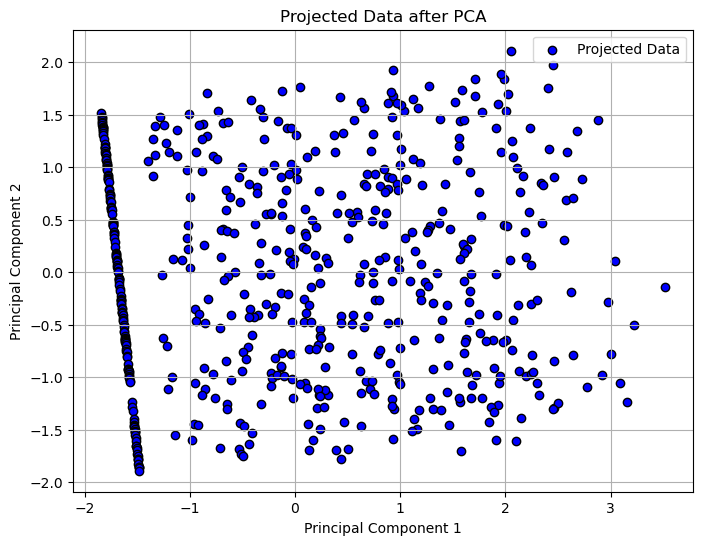

In [25]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c='b', edgecolors='k', label='Projected Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Projected Data after PCA')
plt.legend()
plt.grid()
plt.show()